In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [3]:
## mengambil data contoh
raw_data = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dataset_statistic.csv", sep=';')

In [4]:
## melihat isi dari data
print(raw_data)

    ID Pelanggan     Nama  Jenis Kelamin  Pendapatan Produk   Harga  Jumlah   \
0              1     Arif              1      600000      A  100000        4   
1              2     Dian              2     1200000      D  250000        4   
2              3    Dinda              2      950000      D  250000        3   
3              4    Fajar              1      400000      A  100000        2   
4              5      Ika              2     1200000      D  250000        4   
5              6    Ilham              1      800000      B  150000        4   
6              7    Indra              1      950000      B  150000        5   
7              8  Kartika              2     1100000      E  300000        3   
8              9  Lestari              2      800000      E  300000        2   
9             10      Lia              2     1700000      E  300000        5   
10            11    Maria              2      600000      A  100000        4   
11            12     Maya              2

<Figure size 432x288 with 0 Axes>

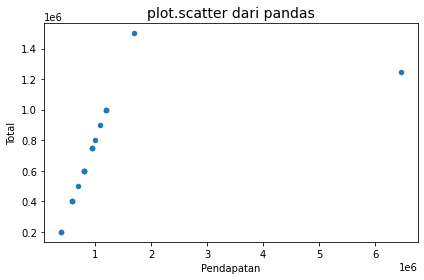

In [5]:
plt.figure()
# visualisasi diagram pencar untuk variabel 'Pendapatan' dan 'Total' menggunakan 'plot.scatter' dari pandas
raw_data.plot.scatter(x='Pendapatan', y='Total')
plt.title('plot.scatter dari pandas', size=14)
plt.tight_layout()
plt.show()

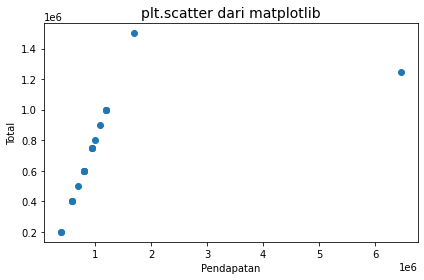

In [6]:
# visualisasi diagram pencar untuk variabel 'Pendapatan' dan 'Total' menggunakan 'plt.scatter' dari matplotlib
plt.scatter(x='Pendapatan', y='Total', data=raw_data)
plt.title('plt.scatter dari matplotlib', size=14)
plt.xlabel('Pendapatan')
plt.ylabel('Total')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

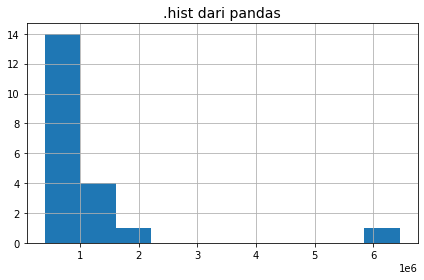

In [7]:
plt.figure()
# melihat distribusi data kolom 'Pendapatan' menggunakan 'hist' dari pandas
raw_data.hist(column='Pendapatan')
plt.title('.hist dari pandas', size=14)
plt.tight_layout()
plt.show()

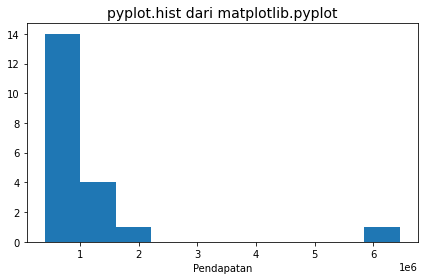

In [8]:
plt.figure()
# melihat distribusi data kolom 'Pendapatan' menggunakan 'pyplot.hist' dari matplotlib.pyplot
plt.hist(x='Pendapatan', data=raw_data)
plt.xlabel('Pendapatan')
plt.title('pyplot.hist dari matplotlib.pyplot', size=14)
plt.tight_layout()
plt.show()

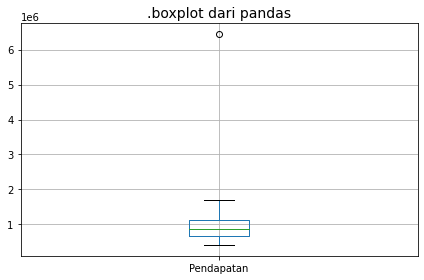

In [9]:
# melihat box plot dari kolom 'Pendapatan' menggunakan method '.boxplot' dari pandas
plt.figure()
raw_data.boxplot(column='Pendapatan')
plt.title('.boxplot dari pandas', size=14)
plt.tight_layout()
plt.show()

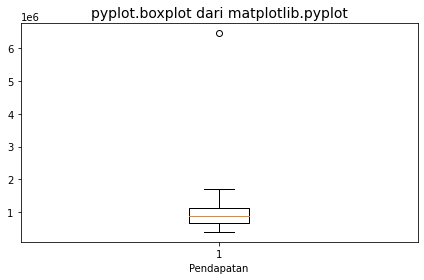

In [10]:
# melihat box plot dari kolom 'Pendapatan' menggunakan method '.boxplot' dari matplotlib
plt.figure()
plt.boxplot(x = 'Pendapatan', data=raw_data)
plt.xlabel('Pendapatan')
plt.title('pyplot.boxplot dari matplotlib.pyplot', size=14)
plt.tight_layout()
plt.show()

In [11]:
# hitung frekuensi dari masing-masing nilai pada kolom 'Produk'
class_freq = raw_data['Produk'].value_counts()

In [12]:
# lihat nilai dari class_freq
print(class_freq)

D    5
A    4
C    4
B    4
E    3
Name: Produk, dtype: int64


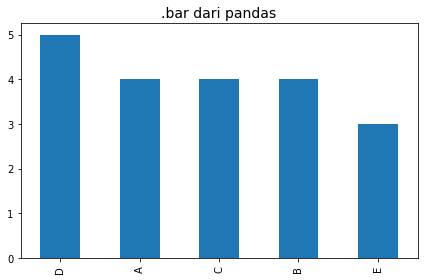

In [13]:
plt.figure()
# membuat bar plot dengan method `plot.bar()` dari pandas
class_freq.plot.bar()
plt.title('.bar dari pandas', size=14)
plt.tight_layout()
plt.show()

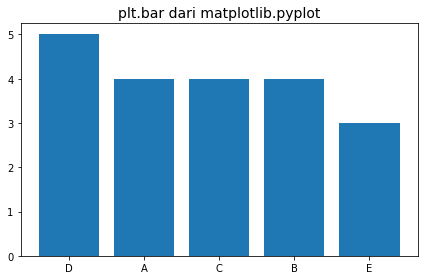

In [14]:
plt.figure()
# membuat bar plot dengan method `plt.bar()` dari matplotlib
plt.bar(x=class_freq.index, height=class_freq.values)
plt.title('plt.bar dari matplotlib.pyplot', size=14)
plt.tight_layout()
plt.show()

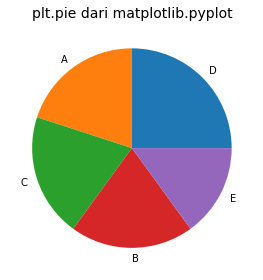

In [15]:
plt.figure()
# membuat pie chart menggunakan method 'pyplot.pie()' dari matplotlib
plt.pie(class_freq.values, labels=class_freq.index)
plt.title('plt.pie dari matplotlib.pyplot', size=14)
plt.tight_layout()
plt.show()

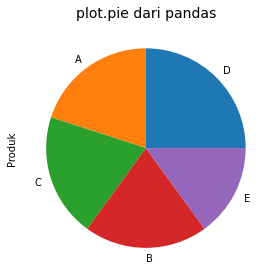

In [16]:
plt.figure()
# membuat pie chart menggunakan method 'plot.pie' dari pandas
class_freq.plot.pie()
plt.title('plot.pie dari pandas', size=14)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

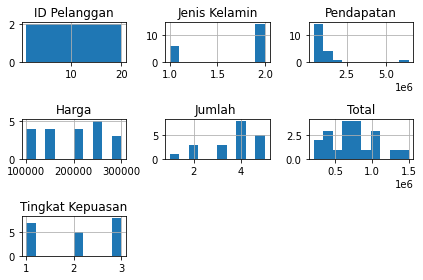

In [17]:
plt.figure()
raw_data.hist()
plt.title('Histogram seluruh kolom', size=14)
plt.tight_layout()
plt.show()

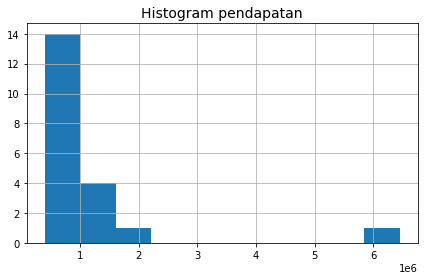

In [18]:
plt.figure()
raw_data['Pendapatan'].hist()
plt.title('Histogram pendapatan', size=14)
plt.tight_layout()
plt.show()

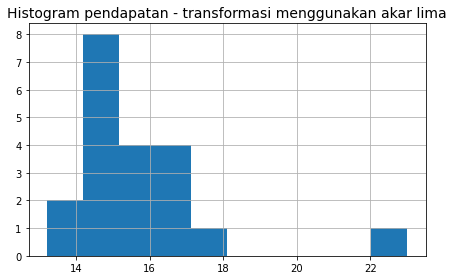

In [19]:
plt.figure()
# transformasi menggunakan akar lima
np.power(raw_data['Pendapatan'], 1/5).hist()
plt.title('Histogram pendapatan - transformasi menggunakan akar lima', size=14)
plt.tight_layout()
plt.show()

In [20]:
# simpan hasil transformasi
pendapatan_akar_lima = np.power(raw_data['Pendapatan'], 1/5)

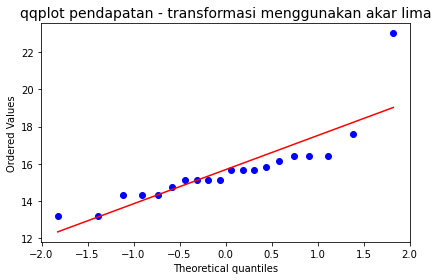

In [21]:
plt.figure()
# membuat qqplot pendapatan - transformasi menggunakan akar lima
stats.probplot(pendapatan_akar_lima, plot=plt)
plt.title('qqplot pendapatan - transformasi menggunakan akar lima', size=14)
plt.tight_layout()
plt.show()

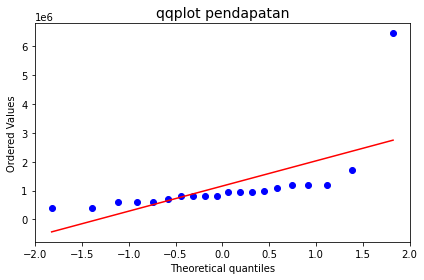

In [22]:
plt.figure()
# membuat qqplot pendapatan
stats.probplot(raw_data['Pendapatan'], plot=plt)
plt.title('qqplot pendapatan', size=14)
plt.tight_layout()
plt.show()

In [23]:
hasil, _= stats.boxcox(raw_data['Pendapatan'])

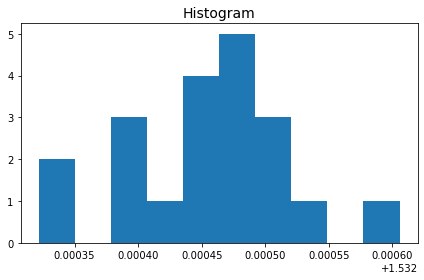

In [24]:
plt.figure()
# Histogram
plt.hist(hasil)
plt.title('Histogram', size=14)
plt.tight_layout()
plt.show()

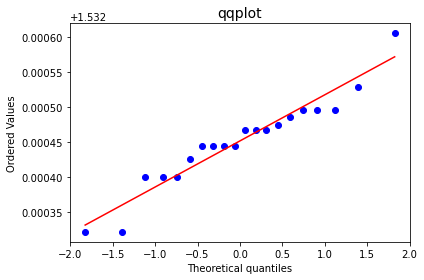

In [25]:
plt.figure()
# QQPlot
stats.probplot(hasil, plot=plt)
plt.title('qqplot', size=14)
plt.tight_layout()
plt.show()

In [26]:
print(raw_data['Produk'])

0     A
1     D
2     D
3     A
4     D
5     B
6     B
7     E
8     E
9     E
10    A
11    B
12    C
13    D
14    C
15    B
16    C
17    D
18    A
19    C
Name: Produk, dtype: object


In [27]:
data_dummy_produk = pd.get_dummies(raw_data['Produk'])

In [28]:
print(data_dummy_produk)

    A  B  C  D  E
0   1  0  0  0  0
1   0  0  0  1  0
2   0  0  0  1  0
3   1  0  0  0  0
4   0  0  0  1  0
5   0  1  0  0  0
6   0  1  0  0  0
7   0  0  0  0  1
8   0  0  0  0  1
9   0  0  0  0  1
10  1  0  0  0  0
11  0  1  0  0  0
12  0  0  1  0  0
13  0  0  0  1  0
14  0  0  1  0  0
15  0  1  0  0  0
16  0  0  1  0  0
17  0  0  0  1  0
18  1  0  0  0  0
19  0  0  1  0  0


In [29]:
raw_data.skew()

ID Pelanggan        0.000000
Jenis Kelamin      -0.945300
Pendapatan          4.057334
Harga              -0.031374
Jumlah             -0.717438
Total               0.569091
Tingkat Kepuasan   -0.104314
dtype: float64

In [30]:
hasil_1 = np.power(raw_data['Pendapatan'], 1/5)
stats.skew(hasil_1)

2.2843058545185624

In [31]:
hasil_2, _ = stats.boxcox(raw_data['Pendapatan'])
stats.skew(hasil_2)

-0.08060561219862179

In [32]:
# mengatur ukuran gambar/plot
plt.rcParams['figure.dpi'] = 100

<ipython-input-33-0a11f37aa4f1>:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

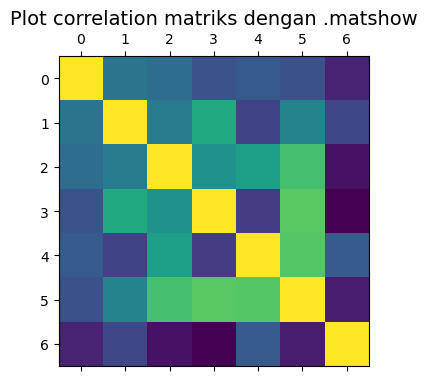

In [33]:
plt.figure()
plt.matshow(raw_data.corr())
plt.title('Plot correlation matriks dengan .matshow', size=14)
plt.tight_layout()
plt.show()

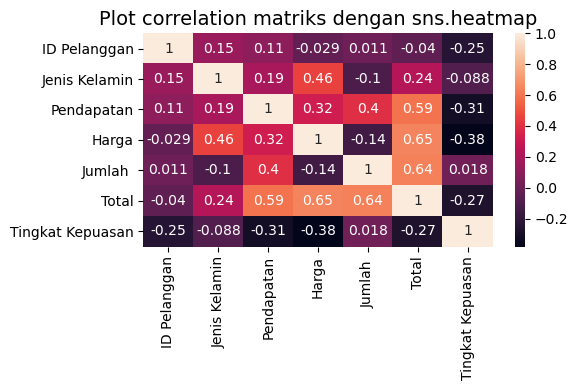

In [34]:
plt.figure()
sns.heatmap(raw_data.corr(), annot=True)
plt.title('Plot correlation matriks dengan sns.heatmap', size=14)
plt.tight_layout()
plt.show()

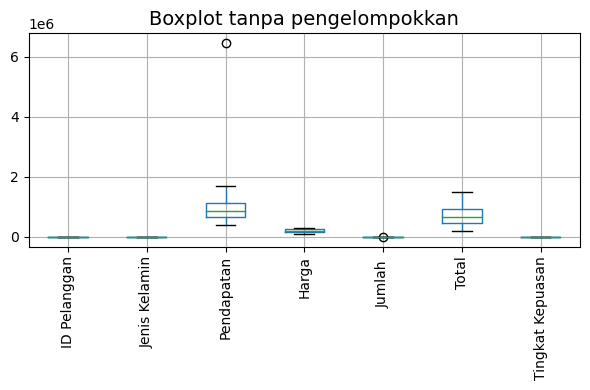

In [35]:
plt.figure()
# boxplot biasa tanpa pengelompokkan
raw_data.boxplot(rot=90)
plt.title('Boxplot tanpa pengelompokkan', size=14)
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

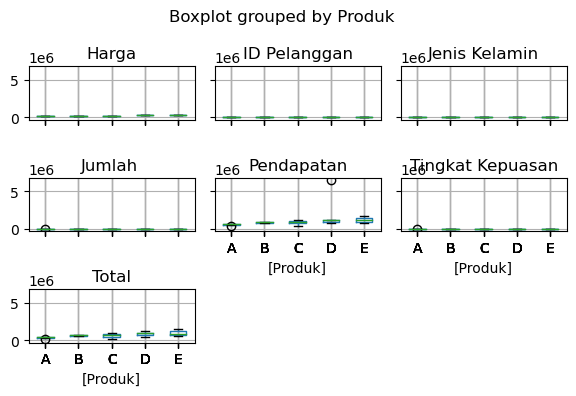

In [36]:
plt.figure()
# box plot dengan pengelompokkan dilakukan oleh kolom 'Produk'
raw_data.boxplot(by='Produk')
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

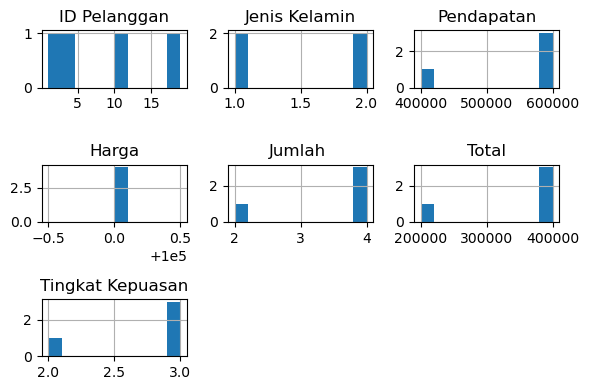

In [37]:
plt.figure()
raw_data[raw_data['Produk'] == 'A'].hist()
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

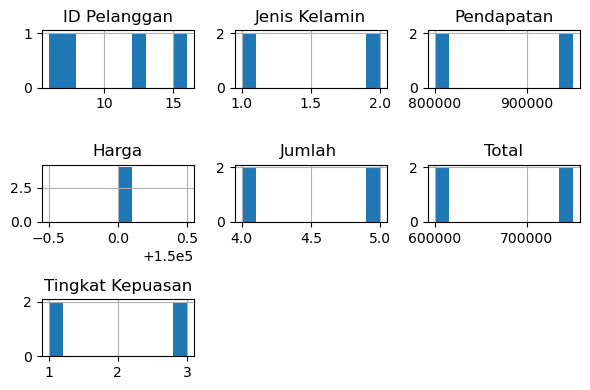

In [38]:
plt.figure()
raw_data[raw_data['Produk'] == 'B'].hist()
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

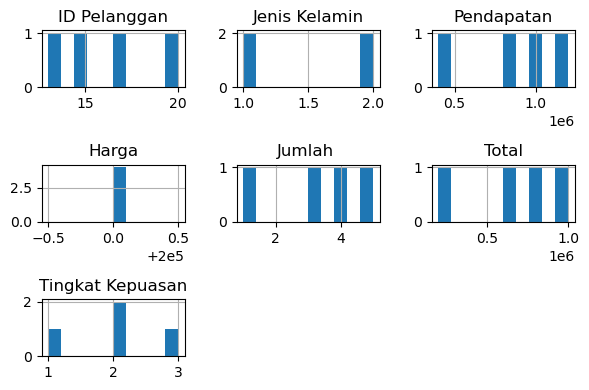

In [39]:
plt.figure()
raw_data[raw_data['Produk'] == 'C'].hist()
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

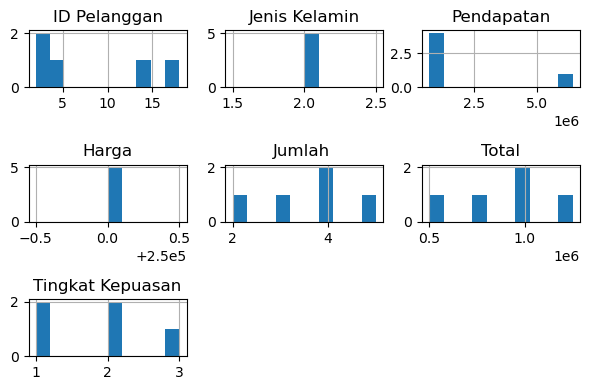

In [40]:
plt.figure()
raw_data[raw_data['Produk'] == 'D'].hist()
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

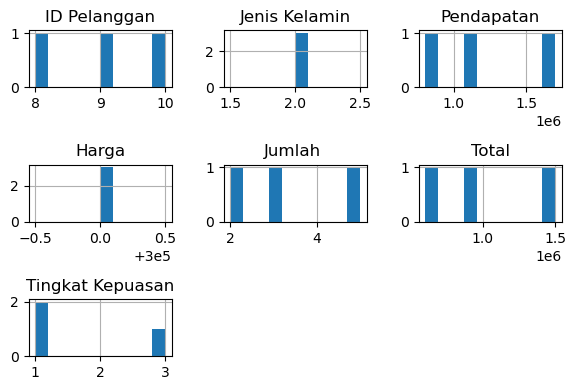

In [41]:
plt.figure()
raw_data[raw_data['Produk'] == 'E'].hist()
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

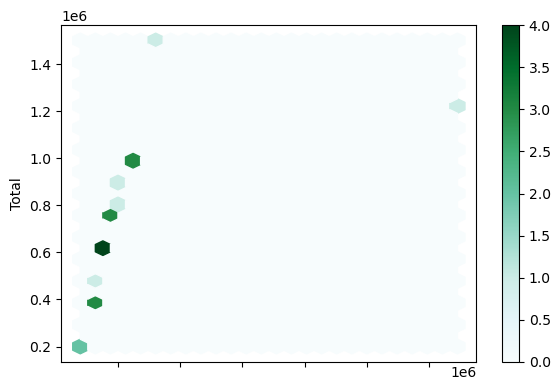

In [42]:
plt.figure()
raw_data.plot.hexbin(x='Pendapatan', y='Total', gridsize=25, rot=90)
plt.tight_layout()
plt.show()

<ipython-input-43-908fe30a0656>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scatter_matrix(raw_data, ax=ax)


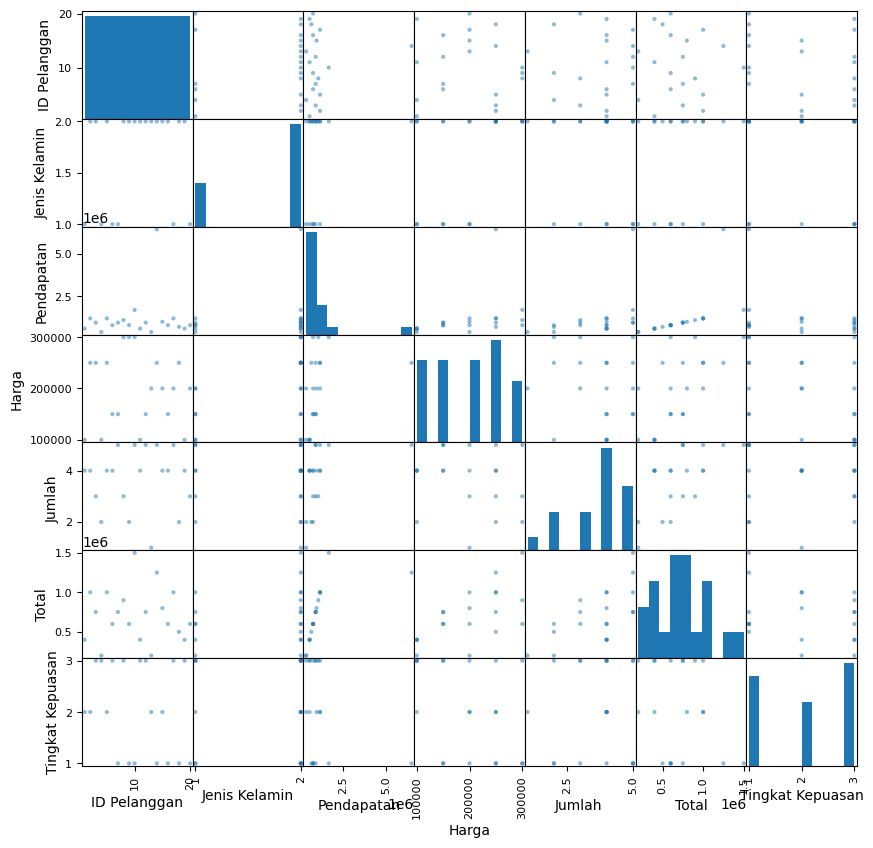

In [43]:
_, ax = plt.subplots(1, 1, figsize=(10,10))
scatter_matrix(raw_data, ax=ax)
plt.show()

<ipython-input-44-1541a4ad8133>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scatter_matrix(raw_data, diagonal='kde', ax=ax)


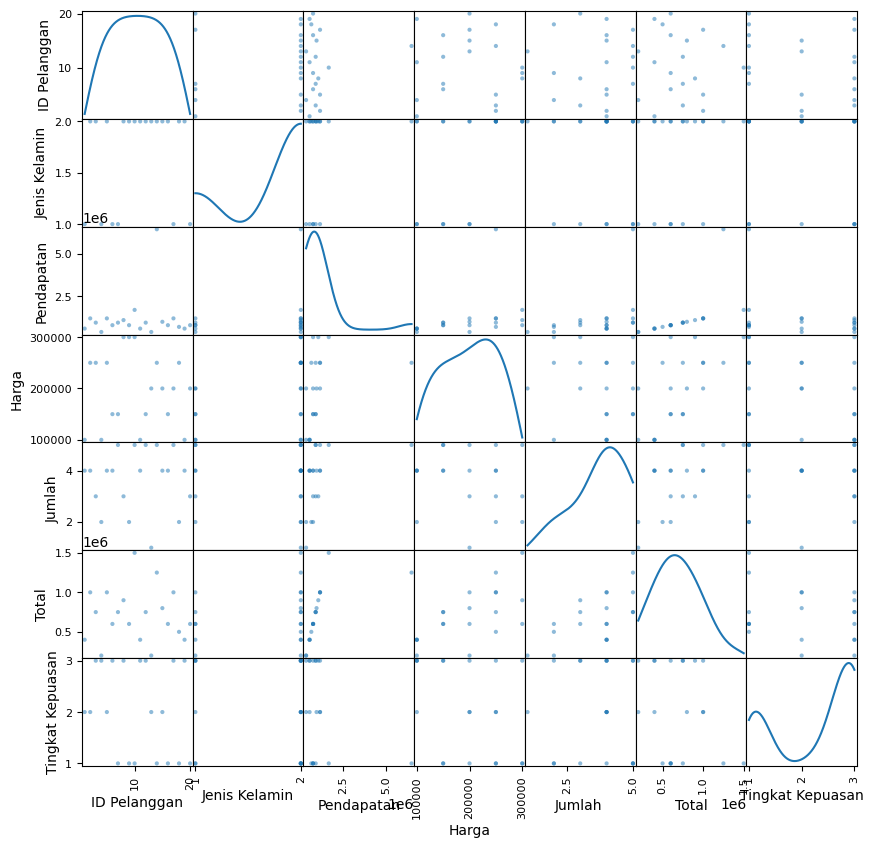

In [44]:
_, ax = plt.subplots(1, 1, figsize=(10,10))
scatter_matrix(raw_data, diagonal='kde', ax=ax)
plt.show()

In [45]:
# variabel tak bebas
nilai_Y = raw_data[['Total']]
# variabel bebas
nilai_X = sm.add_constant(raw_data['Pendapatan'])

In [46]:
# membuat model regresi linier
model_regresi = sm.OLS(endog = nilai_Y, exog=nilai_X).fit()

In [47]:
# melihat summary dari model
model_regresi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     9.714
Date:                Wed, 03 Feb 2021   Prob (F-statistic):            0.00596
Time:                        22:42:45   Log-Likelihood:                -277.92
No. Observations:                  20   AIC:                             559.8
Df Residuals:                      18   BIC:                             561.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.313e+05   8.43e+04      6.300      0.000    3.54e+05    7.08e+05
Pendapatan     0.1541      0.049      3.117      0.006       0.050       0.258
==============================================================================
Omnibus:                        3.582   Durbin-Watson:                   2.516
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                1.859
Skew:                           0.702   Prob(JB):                        0.395
Kurtosis:                       3.511   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""